Preprocess

In [1]:
# ===== BERT-OPTIMIZED TURKISH ADDRESS PREPROCESSING =====
import re
from unidecode import unidecode

def bert_optimized_address_preprocessing(text):
    """
    BERT modeli için optimize edilmiş Türkçe adres preprocessing fonksiyonu.
    Tüm preprocessing adımlarını birleştirir ve BERT'in en iyi performansı için tasarlanmıştır.
    """
    if not isinstance(text, str) or not text.strip():
        return ""
    
    # Orijinal metni koru (bazı analizler için)
    original_text = text
    
    # --- PHASE 1: INITIAL CLEANING ---
    # Küçük harfe çevir
    text = text.lower().strip()
    
    # Çoklu boşlukları ve tab/newline karakterlerini temizle
    text = re.sub(r'\s+', ' ', text)
    
    # --- PHASE 2: TURKISH CHARACTER NORMALIZATION ---
    # Türkçe karakterleri kontrollü şekilde normalize et (BERT türkçe modeli için optimize)
    turkish_normalization = {
        'ç': 'c', 'ğ': 'g', 'ı': 'i', 'ö': 'o', 'ş': 's', 'ü': 'u',
        'â': 'a', 'î': 'i', 'û': 'u', 'ô': 'o'
    }
    for tr_char, en_char in turkish_normalization.items():
        text = text.replace(tr_char, en_char)
    
    # --- PHASE 3: NUMBER & ALPHANUMERIC STANDARDIZATION ---
    # Sayı ve alfanümerik kodları standardize et (BERT tokenization için)
    
    # Alfanümerik kodları ayır: 24/A → 24 A, 12/B → 12 B
    text = re.sub(r'\b(\d+)\s*[/\-\\]\s*([a-zA-Z]\d*)\b', r'\1 \2', text)
    
    # Sayı kombinasyonlarını ayır: 24/5 → 24 5, 3/12 → 3 12  
    text = re.sub(r'\b(\d+)\s*[/\-\\]\s*(\d+)\b', r'\1 \2', text)
    
    # Noktalı sayıları ayır: 24.5 → 24 5 (BERT için)
    text = re.sub(r'\b(\d+)[.,](\d+)\b', r'\1 \2', text)
    
    # --- PHASE 4: COMPREHENSIVE ABBREVIATION EXPANSION ---
    # Türkiye'de yaygın kullanılan adres kısaltmaları
    abbreviations = {
        # Temel adres bileşenleri
        r'\bmah\.?\b': 'mahallesi',
        r'\bmahalle\b': 'mahallesi',
        r'\bmhl\.?\b': 'mahallesi',
        
        r'\bsok\.?\b': 'sokak',
        r'\bsk\.?\b': 'sokak',
        r'\bsokagi\b': 'sokak',
        
        r'\bcad\.?\b': 'caddesi',
        r'\bcd\.?\b': 'caddesi',
        r'\bcaddesi\b': 'caddesi',
        
        r'\bblv\.?\b': 'bulvari',
        r'\bbulvar\b': 'bulvari',
        r'\bblvr\.?\b': 'bulvari',
        
        r'\bno\.?\b': 'numara',
        r'\bnumara\b': 'numara',
        r'\bnum\.?\b': 'numara',
        
        # Yapı bileşenleri
        r'\bapt\.?\b': 'apartmani',
        r'\bapartman\b': 'apartmani',
        r'\bapart\.?\b': 'apartmani',
        
        r'\bd\.?\b': 'daire',
        r'\bdaire\b': 'daire',
        r'\bdr\.?\b': 'daire',
        
        r'\bk\.?\b': 'kat',
        r'\bkat\b': 'kat',
        r'\bkati\b': 'kat',
        
        r'\bblok\b': 'blok',
        r'\bbl\.?\b': 'blok',
        
        # Site ve kompleks
        r'\bsit\.?\b': 'sitesi',
        r'\bsite\b': 'sitesi',
        r'\bkonut\.?\b': 'konutlari',
        r'\bkompleks\b': 'kompleksi',
        r'\brezidans\b': 'rezidansi',
        
        # Diğer yaygın kısaltmalar
        r'\bpk\.?\b': 'park',
        r'\bpark\b': 'park',
        r'\bmez\.?\b': 'mezarligi',
        r'\bmeydan\b': 'meydani',
        r'\bmeyd\.?\b': 'meydani',
        r'\bçık\.?\b': 'cikmazı',
        r'\bçıkmaz\b': 'cikmazı'
    }
    
    for abbr_pattern, full_form in abbreviations.items():
        text = re.sub(abbr_pattern, full_form, text, flags=re.IGNORECASE)
    
    # --- PHASE 5: GEOGRAPHIC STANDARDIZATION ---
    # Yön ve konum belirteçleri
    directional_terms = {
        r'\bkuzey\b': 'kuzey',
        r'\bguney\b': 'guney',
        r'\bdogu\b': 'dogu',
        r'\bbati\b': 'bati',
        r'\biç\b': 'ic',
        r'\biçi\b': 'ic',
        r'\bdış\b': 'dis',
        r'\bdışı\b': 'dis',
        r'\balt\b': 'alt',
        r'\büst\b': 'ust',
        r'\bön\b': 'on',
        r'\barka\b': 'arka',
        r'\bsag\b': 'sag',
        r'\bsol\b': 'sol'
    }
    
    for direction_pattern, standardized in directional_terms.items():
        text = re.sub(direction_pattern, standardized, text, flags=re.IGNORECASE)
    
    # --- PHASE 6: CITY/DISTRICT NORMALIZATION ---
    # Büyük şehir ve ilçe isimleri standardizasyonu
    major_locations = {
        r'\bist\.?\b': 'istanbul',
        r'\bistanbul\b': 'istanbul',
        r'\bank\.?\b': 'ankara',
        r'\bankara\b': 'ankara',
        r'\bizm\.?\b': 'izmir',
        r'\bizmir\b': 'izmir',
        r'\bbeyoglu\b': 'beyoglu',
        r'\bkadikoy\b': 'kadikoy',
        r'\bbesiktas\b': 'besiktas',
        r'\buskudar\b': 'uskudar',
        r'\bsisli\b': 'sisli',
        r'\bfatih\b': 'fatih',
        r'\besenler\b': 'esenler',
        r'\bbahcelievler\b': 'bahcelievler'
    }
    
    for location_pattern, standardized in major_locations.items():
        text = re.sub(location_pattern, standardized, text, flags=re.IGNORECASE)
    
    # --- PHASE 7: NOISE REMOVAL ---
    # Gereksiz kelime ve ifadeleri kaldır
    noise_patterns = [
        r'\bmevki\b', r'\bmevkii\b', r'\byakini\b', r'\bcivarı\b',
        r'\bkarsisi\b', r'\bkarsisinda\b', r'\byani\b', r'\byaninda\b',
        r'\bonu\b', r'\bonunde\b', r'\barkasi\b', r'\barkasinda\b',
        r'\biçinde\b', r'\biçerisinde\b', r'\buzerinde\b', r'\baltinda\b'
    ]
    
    for noise_pattern in noise_patterns:
        text = re.sub(noise_pattern, '', text, flags=re.IGNORECASE)
    
    # --- PHASE 8: FEATURE EXTRACTION & TAGGING ---
    features = []
    
    # Posta kodu tespiti ve DOĞRUDAN EKLEME (generic tag yerine)
    postal_matches = re.findall(r'\b\d{5}\b', original_text)
    if postal_matches:
        # En büyük posta kodunu al (çoklu varsa en önemlisi genelde büyük olandır)
        main_postal = max(postal_matches)
        features.append(f'POSTAL_{main_postal}')
    
    # Apartman tespiti
    if re.search(r'\b(apt|apartman|apart)\b', original_text, re.IGNORECASE):
        features.append('APARTMENT')
    
    # Kat bilgisi tespiti
    if re.search(r'\b(\d+\.?\s*(kat|kati)|kat\s*\d+|(zemin|bodrum|cati)\s*kat)\b', original_text, re.IGNORECASE):
        features.append('FLOOR_INFO')
    
    # Daire/kapı numarası tespiti
    if re.search(r'\b(daire|d\.)\s*\d+\b', original_text, re.IGNORECASE):
        features.append('UNIT_NUMBER')
    
    # Site/kompleks tespiti
    if re.search(r'\b(site|sitesi|kompleks|kompleksi|rezidans|rezidansi|konut)\b', original_text, re.IGNORECASE):
        features.append('COMPLEX')
    
    # Blok bilgisi tespiti
    if re.search(r'\b(blok|bl\.?)\s*[a-zA-Z0-9]\b', original_text, re.IGNORECASE):
        features.append('BLOCK_INFO')
    
    # --- PHASE 9: FINAL CLEANUP ---
    # Özel karakterleri ve noktalamayı temizle (BERT için)
    text = re.sub(r'[^\w\s]', ' ', text)
    
    # Fazla boşlukları temizle
    text = re.sub(r'\s+', ' ', text).strip()
    
    # AKILLI KELİME FİLTRELEME: Anlamlı tek harfleri koru!
    words = text.split()
    filtered_words = []
    for i, word in enumerate(words):
        # Sayıları her zaman koru
        if word.isdigit():
            filtered_words.append(word)
        # Tek harf ama anlamlı ise koru (A blok, B kapısı vb.)
        elif len(word) == 1 and word.isalpha():
            # Önceki veya sonraki kelimeye bak
            context_words = []
            if i > 0:
                context_words.append(words[i-1].lower())
            if i < len(words) - 1:
                context_words.append(words[i+1].lower())
            
            # Blok, kapi, daire vb. bağlamında tek harf anlamlıdır
            meaningful_contexts = ['blok', 'kapi', 'kapisi', 'daire', 'apartmani', 'sitesi', 'mahallesi']
            if any(ctx in meaningful_contexts for ctx in context_words):
                filtered_words.append(word)
            # Yoksa çok kısa kelimeyi atla
        # Normal kelimeler (2+ karakter)
        elif len(word) >= 2:
            filtered_words.append(word)
    
    text = ' '.join(filtered_words)
    
    # --- PHASE 10: FEATURE INTEGRATION ---
    # Feature'ları metne entegre et (BERT için ek sinyal)
    if features:
        feature_string = ' '.join(features)
        text = f"{text} {feature_string}"
    
    # Final temizlik
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text


Data Yükleme

In [9]:
# --- 1. Gerekli Kütüphanelerin Yüklenmesi ---
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
import gc

print("CUDA available:", torch.cuda.is_available())
print("GPU:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "None")

# --- 2. Veri Yükleme ve Label Analizi ---
df_full = pd.read_csv('train.csv')
print(f"Toplam veri: {len(df_full)} satır")

# Label dağılımını analiz et
label_counts = df_full['label'].value_counts()
print(f"Toplam benzersiz label: {len(label_counts)}")

# En fazla data içeren 500 label
top_500_labels = label_counts.head(500).index.tolist()
print(f"En fazla data içeren 500 label: {label_counts.head(500).sum()} satır")

# En az data içeren 500 label  
bottom_500_labels = label_counts.tail(500).index.tolist()
print(f"En az data içeren 500 label: {label_counts.tail(500).sum()} satır")

# Label dağılım istatistikleri
print(f"\nLabel Dağılım İstatistikleri:")
print(f"En fazla veri içeren label: {label_counts.iloc[0]} satır")
print(f"En az veri içeren label: {label_counts.iloc[-1]} satır")
print(f"Top 500 ortalama: {label_counts.head(500).mean():.1f} satır")
print(f"Bottom 500 ortalama: {label_counts.tail(500).mean():.1f} satır")

# Seçilen label'ları birleştir
selected_labels = top_500_labels + bottom_500_labels
print(f"\nToplam seçilen label sayısı: {len(selected_labels)}")

# Veriyi filtrele
df = df_full[df_full['label'].isin(selected_labels)].copy()
print(f"Filtrelenmiş veri seti: {len(df)} satır")

# Class imbalance analizi
filtered_label_counts = df['label'].value_counts()
print(f"\nClass Imbalance Analizi:")
print(f"En fazla: {filtered_label_counts.iloc[0]} satır")
print(f"En az: {filtered_label_counts.iloc[-1]} satır")
print(f"Imbalance ratio: {filtered_label_counts.iloc[0] / filtered_label_counts.iloc[-1]:.1f}")

df = df.dropna(subset=['address', 'label'])
df['label'] = df['label'].astype(int)

# --- 3. Label Encoding ---
label_encoder = LabelEncoder()
df['encoded_label'] = label_encoder.fit_transform(df['label'])
num_labels = len(label_encoder.classes_)
print(f"Sınıf sayısı: {num_labels}")

# --- 4. YENİ BERT-OPTIMIZED PREPROCESSING ---

# YENİ OPTIMIZE EDİLMİŞ PREPROCESSING KULLAN
print("📊 Yeni preprocessing uygulanıyor...")
df['address_bert_optimized'] = df['address'].apply(bert_optimized_address_preprocessing)

# Preprocessing karşılaştırması
print("\n📊 BERT-Optimized Preprocessing örnekleri:")
for i in range(5):
    original = df['address'].iloc[i]
    optimized = df['address_bert_optimized'].iloc[i]
    print(f"\n{i+1}. Örnek:")
    print(f"   📝 Orijinal:  '{original}'")
    print(f"   🎯 Optimized: '{optimized}'")
    print(f"   📏 Uzunluk:   {len(original)} → {len(optimized)} karakter")

# BERT-optimized veriyi kullan
X = df['address_bert_optimized'].tolist()
y = df['encoded_label'].tolist()
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)

print(f"\n✅ BERT-optimized preprocessing tamamlandı!")
print(f"📊 Ortalama adres uzunluğu: {df['address_bert_optimized'].str.len().mean():.1f} karakter")
print(f"📊 Training set: {len(X_train):,} samples")
print(f"📊 Validation set: {len(X_val):,} samples")

# --- 5. BERT Model ---
model_name = "dbmdz/bert-base-turkish-cased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)

# --- 6. Tokenization ---
print("Tokenizasyon başlıyor.")
train_encodings = tokenizer(X_train, truncation=True, padding=True, max_length=256)
val_encodings = tokenizer(X_val, truncation=True, padding=True, max_length=256)
print("Tokenizasyon tamamlandı.")

# --- 7. Dataset ---
class AddressDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = AddressDataset(train_encodings, y_train)
val_dataset = AddressDataset(val_encodings, y_val)

CUDA available: True
GPU: NVIDIA GeForce RTX 4060 Ti
Toplam veri: 848237 satır
Toplam benzersiz label: 10390
En fazla data içeren 500 label: 79876 satır
En az data içeren 500 label: 20255 satır

Label Dağılım İstatistikleri:
En fazla veri içeren label: 536 satır
En az veri içeren label: 40 satır
Top 500 ortalama: 159.8 satır
Bottom 500 ortalama: 40.5 satır

Toplam seçilen label sayısı: 1000
Filtrelenmiş veri seti: 100131 satır

Class Imbalance Analizi:
En fazla: 536 satır
En az: 40 satır
Imbalance ratio: 13.4
Sınıf sayısı: 1000
📊 Yeni preprocessing uygulanıyor...
Toplam veri: 848237 satır
Toplam benzersiz label: 10390
En fazla data içeren 500 label: 79876 satır
En az data içeren 500 label: 20255 satır

Label Dağılım İstatistikleri:
En fazla veri içeren label: 536 satır
En az veri içeren label: 40 satır
Top 500 ortalama: 159.8 satır
Bottom 500 ortalama: 40.5 satır

Toplam seçilen label sayısı: 1000
Filtrelenmiş veri seti: 100131 satır

Class Imbalance Analizi:
En fazla: 536 satır
En az:

CUDA available: True
GPU: NVIDIA GeForce RTX 4060 Ti
Toplam veri: 848237 satır
Toplam benzersiz label: 10390
En fazla data içeren 500 label: 79876 satır
En az data içeren 500 label: 20255 satır

Label Dağılım İstatistikleri:
En fazla veri içeren label: 536 satır
En az veri içeren label: 40 satır
Top 500 ortalama: 159.8 satır
Bottom 500 ortalama: 40.5 satır

Toplam seçilen label sayısı: 1000
Filtrelenmiş veri seti: 100131 satır

Class Imbalance Analizi:
En fazla: 536 satır
En az: 40 satır
Imbalance ratio: 13.4
Sınıf sayısı: 1000
📊 Yeni preprocessing uygulanıyor...
Toplam veri: 848237 satır
Toplam benzersiz label: 10390
En fazla data içeren 500 label: 79876 satır
En az data içeren 500 label: 20255 satır

Label Dağılım İstatistikleri:
En fazla veri içeren label: 536 satır
En az veri içeren label: 40 satır
Top 500 ortalama: 159.8 satır
Bottom 500 ortalama: 40.5 satır

Toplam seçilen label sayısı: 1000
Filtrelenmiş veri seti: 100131 satır

Class Imbalance Analizi:
En fazla: 536 satır
En az:

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dbmdz/bert-base-turkish-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


CUDA available: True
GPU: NVIDIA GeForce RTX 4060 Ti
Toplam veri: 848237 satır
Toplam benzersiz label: 10390
En fazla data içeren 500 label: 79876 satır
En az data içeren 500 label: 20255 satır

Label Dağılım İstatistikleri:
En fazla veri içeren label: 536 satır
En az veri içeren label: 40 satır
Top 500 ortalama: 159.8 satır
Bottom 500 ortalama: 40.5 satır

Toplam seçilen label sayısı: 1000
Filtrelenmiş veri seti: 100131 satır

Class Imbalance Analizi:
En fazla: 536 satır
En az: 40 satır
Imbalance ratio: 13.4
Sınıf sayısı: 1000
📊 Yeni preprocessing uygulanıyor...
Toplam veri: 848237 satır
Toplam benzersiz label: 10390
En fazla data içeren 500 label: 79876 satır
En az data içeren 500 label: 20255 satır

Label Dağılım İstatistikleri:
En fazla veri içeren label: 536 satır
En az veri içeren label: 40 satır
Top 500 ortalama: 159.8 satır
Bottom 500 ortalama: 40.5 satır

Toplam seçilen label sayısı: 1000
Filtrelenmiş veri seti: 100131 satır

Class Imbalance Analizi:
En fazla: 536 satır
En az:

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dbmdz/bert-base-turkish-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Tokenizasyon başlıyor.
Tokenizasyon tamamlandı.
Tokenizasyon tamamlandı.


In [10]:
from sklearn.metrics import f1_score
import numpy as np
from transformers import TrainerCallback
from sklearn.utils.class_weight import compute_class_weight

# Training callback - basit LR tracking
class TrainingStepCallback(TrainerCallback):
    def __init__(self):
        self.logged_steps = set()
    
    def on_log(self, args, state, control, logs=None, **kwargs):
        if logs and 'learning_rate' in logs:
            step = state.global_step
            if step not in self.logged_steps:
                print(f"📈 Step {step}: LR = {logs['learning_rate']:.2e}")
                self.logged_steps.add(step)

# Metrics hesaplama fonksiyonu
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    
    # Eğer predictions tuple ise, ilk elemanını al (preprocess_logits_for_metrics'ten gelirse)
    if isinstance(predictions, tuple):
        predictions = predictions[0]
    
    # Tensor'ları numpy'a çevir
    if isinstance(predictions, torch.Tensor):
        predictions = predictions.cpu().numpy()
    if isinstance(labels, torch.Tensor):
        labels = labels.cpu().numpy()
    
    # Eğer predictions 2D ise (batch_size, 1) flatten et
    if len(predictions.shape) > 1:
        predictions = predictions.flatten()
    if len(labels.shape) > 1:
        labels = labels.flatten()
    
    # F1 Score hesapla (predictions zaten argmax'lanmış)
    f1 = f1_score(labels, predictions, average='macro')
    
    return {'f1': f1}

# GPU OOM önleme - Logits preprocessing
def preprocess_logits_for_metrics(logits, labels):
    """Logits'i argmax'layarak memory kullanımını azaltır"""
    pred_ids = torch.argmax(logits, dim=-1)
    return pred_ids, labels

# --- CLASS WEIGHT ANALİZİ VE HESAPLAMA ---
print("\n" + "="*80)
print("⚖️ CLASS WEIGHT ANALİZİ VE HESAPLAMA")
print("="*80)

# Training set'teki class dağılımını analiz et
train_class_counts = pd.Series(y_train).value_counts().sort_index()
print(f"📊 Training set class dağılımı:")
print(f"   🔢 Toplam sınıf sayısı: {len(train_class_counts)}")
print(f"   📈 En fazla örnek: {train_class_counts.max():,} (Class {train_class_counts.idxmax()})")
print(f"   📉 En az örnek: {train_class_counts.min():,} (Class {train_class_counts.idxmin()})")
print(f"   🔄 Imbalance ratio: {train_class_counts.max() / train_class_counts.min():.1f}")
print(f"   📊 Ortalama örnek sayısı: {train_class_counts.mean():.1f}")

# Class weight hesaplama - 'balanced' stratejisi
unique_classes = np.unique(y_train)
class_weights_array = compute_class_weight(
    class_weight='balanced',
    classes=unique_classes,
    y=y_train
)

# Class weight dictionary oluştur
class_weights_dict = {i: weight for i, weight in enumerate(class_weights_array)}

print(f"\n🎯 CLASS WEIGHT İSTATİSTİKLERİ:")
print(f"   ⚖️ Weight hesaplama stratejisi: 'balanced'")
print(f"   📈 En yüksek weight: {max(class_weights_array):.4f}")
print(f"   📉 En düşük weight: {min(class_weights_array):.4f}")
print(f"   🔄 Weight range: {max(class_weights_array)/min(class_weights_array):.1f}")

# Class weight tensor'a çevir (GPU için)
class_weights_tensor = torch.FloatTensor(class_weights_array).to("cuda")
print(f"   ✅ Class weights GPU'ya aktarıldı: {class_weights_tensor.device}")

# Top 10 en yüksek ve en düşük weight'leri göster
sorted_weights = sorted([(i, w) for i, w in enumerate(class_weights_array)], key=lambda x: x[1], reverse=True)
print(f"\n📈 EN YÜKSEK WEIGHT'LER (küçük sınıflar):")
for i, (class_idx, weight) in enumerate(sorted_weights[:5]):
    sample_count = train_class_counts[class_idx]
    print(f"   {i+1}. Class {class_idx}: Weight={weight:.4f}, Samples={sample_count:,}")

print(f"\n📉 EN DÜŞÜK WEIGHT'LER (büyük sınıflar):")
for i, (class_idx, weight) in enumerate(sorted_weights[-5:]):
    sample_count = train_class_counts[class_idx]
    print(f"   {i+1}. Class {class_idx}: Weight={weight:.4f}, Samples={sample_count:,}")

# --- WEIGHTED LOSS FUNCTION - YENİ VERSİYON ---
class WeightedTrainer(Trainer):
    def __init__(self, class_weights, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.class_weights = class_weights
    
    def compute_loss(self, model, inputs, return_outputs=False, num_items_in_batch=None):
        """
        Weighted CrossEntropyLoss ile loss hesaplama.
        num_items_in_batch parametresi yeni Transformers versiyonları için eklendi.
        """
        labels = inputs.get("labels")
        # Forward pass
        outputs = model(**inputs)
        logits = outputs.get("logits")
        
        # Weighted CrossEntropyLoss hesapla
        loss_fct = torch.nn.CrossEntropyLoss(weight=self.class_weights)
        loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))
        
        return (loss, outputs) if return_outputs else loss

model.to("cuda")

# --- 8. WEIGHTED Fine-tuning Parametreleri ---
training_args = TrainingArguments(
    output_dir='./results_imbalance_weighted',  # Weighted model için ayrı klasör
    num_train_epochs=15,
    per_device_train_batch_size=96,
    per_device_eval_batch_size=96,
    learning_rate=2e-4,
    warmup_steps=2000,
    weight_decay=0.01,
    lr_scheduler_type="linear",
    eval_strategy="steps",
    eval_steps=1000,
    save_strategy="steps", 
    save_steps=1000,
    load_best_model_at_end=True,
    save_total_limit=3,
    metric_for_best_model="f1",
    greater_is_better=True,
    report_to=[],
    logging_steps=1000,
    max_grad_norm= 1.0,  # Gradient clipping
    fp16=True,
    seed=42
)

# WEIGHTED Trainer
trainer = WeightedTrainer(
    class_weights=class_weights_tensor,
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
    callbacks=[TrainingStepCallback()],
    preprocess_logits_for_metrics=preprocess_logits_for_metrics
)

print("\n" + "="*80)
print("✅ WEIGHTED TRAINER HAZIR!")
print("="*80)
print(f"🎯 Class Weight Stratejisi: Balanced (sklearn)")
print(f"⚖️ Weight Range: {min(class_weights_array):.4f} - {max(class_weights_array):.4f}")
print(f"🔄 Imbalance Compensation: {max(class_weights_array)/min(class_weights_array):.1f}x")
print(f"📊 Küçük sınıflar {max(class_weights_array)/min(class_weights_array):.1f}x daha fazla ağırlık alacak!")
print(f"🔧 Transformers uyumluluğu: num_items_in_batch parametresi destekleniyor")
print("="*80)


⚖️ CLASS WEIGHT ANALİZİ VE HESAPLAMA
📊 Training set class dağılımı:
   🔢 Toplam sınıf sayısı: 1000
   📈 En fazla örnek: 455 (Class 511)
   📉 En az örnek: 34 (Class 5)
   🔄 Imbalance ratio: 13.4
   📊 Ortalama örnek sayısı: 85.1

🎯 MODERATE CLASS WEIGHT İSTATİSTİKLERİ:
   ⚖️ Weight stratejisi: MODERATE (BERT-friendly)
   🔧 Damping factor: 0.4 (yumuşatma)
   📊 Orijinal balanced range: 13.4x
   ✅ Moderate range: 2.4x
   📈 En yüksek weight: 1.6013
   📉 En düşük weight: 0.6748
   🎯 Hedef: BERT'in doğal öğrenme sürecine minimal müdahale
   ✅ Class weights GPU'ya aktarıldı: cuda:0

📈 EN YÜKSEK WEIGHT'LER (küçük sınıflar):
   1. Class 5: Weight=1.6013, Samples=34
   2. Class 6: Weight=1.6013, Samples=34
   3. Class 8: Weight=1.6013, Samples=34
   4. Class 9: Weight=1.6013, Samples=34
   5. Class 11: Weight=1.6013, Samples=34

📉 EN DÜŞÜK WEIGHT'LER (büyük sınıflar):
   1. Class 155: Weight=0.6973, Samples=350
   2. Class 340: Weight=0.6956, Samples=356
   3. Class 536: Weight=0.6933, Samples=36

In [6]:
# --- 9. WEIGHTED MODEL EĞİTİMİ BAŞLATMA ---
print("\n" + "="*80)
print("🚀 WEIGHTED MODEL EĞİTİMİ BAŞLIYOR")
print("="*80)
print(f"⚖️ Class Weight: AKTIF (balanced strategy)")
print(f"🎯 Hedef: Class imbalance'ı düzeltmek")
print(f"📊 Dataset: Top 500 + Bottom 500 labels ({num_labels} sınıf)")
print(f"🔄 Küçük sınıflar daha fazla ağırlık alacak!")
print("="*80)

trainer.train()

print("\n✅ WEIGHTED MODEL EĞİTİMİ TAMAMLANDI!")
print("🔄 Artık baseline ile weighted model karşılaştırılabilir!")


🚀 WEIGHTED MODEL EĞİTİMİ BAŞLIYOR
⚖️ Class Weight: AKTIF (balanced strategy)
🎯 Hedef: Class imbalance'ı düzeltmek
📊 Dataset: Top 500 + Bottom 500 labels (1000 sınıf)
🔄 Küçük sınıflar daha fazla ağırlık alacak!



🚀 WEIGHTED MODEL EĞİTİMİ BAŞLIYOR
⚖️ Class Weight: AKTIF (balanced strategy)
🎯 Hedef: Class imbalance'ı düzeltmek
📊 Dataset: Top 500 + Bottom 500 labels (1000 sınıf)
🔄 Küçük sınıflar daha fazla ağırlık alacak!


Step,Training Loss,Validation Loss,F1
1000,6.081000,3.390331,0.339226
2000,2.153400,1.429517,0.579170
3000,1.086600,0.938349,0.732161
4000,0.679200,0.792737,0.773434
5000,0.465900,0.693608,0.806963
6000,0.327500,0.659034,0.826471
7000,0.228700,0.620746,0.848811
8000,0.153400,0.608737,0.863872
9000,0.093900,0.600714,0.871517
10000,0.057800,0.605911,0.878304



🚀 WEIGHTED MODEL EĞİTİMİ BAŞLIYOR
⚖️ Class Weight: AKTIF (balanced strategy)
🎯 Hedef: Class imbalance'ı düzeltmek
📊 Dataset: Top 500 + Bottom 500 labels (1000 sınıf)
🔄 Küçük sınıflar daha fazla ağırlık alacak!


Step,Training Loss,Validation Loss


📈 Step 1000: LR = 9.96e-05
📈 Step 2000: LR = 2.00e-04
📈 Step 2000: LR = 2.00e-04
📈 Step 3000: LR = 1.82e-04
📈 Step 3000: LR = 1.82e-04
📈 Step 4000: LR = 1.65e-04
📈 Step 4000: LR = 1.65e-04
📈 Step 5000: LR = 1.47e-04
📈 Step 5000: LR = 1.47e-04
📈 Step 6000: LR = 1.29e-04
📈 Step 6000: LR = 1.29e-04
📈 Step 7000: LR = 1.12e-04
📈 Step 7000: LR = 1.12e-04
📈 Step 8000: LR = 9.39e-05
📈 Step 8000: LR = 9.39e-05
📈 Step 9000: LR = 7.62e-05
📈 Step 9000: LR = 7.62e-05
📈 Step 10000: LR = 5.86e-05
📈 Step 10000: LR = 5.86e-05
📈 Step 11000: LR = 4.09e-05
📈 Step 11000: LR = 4.09e-05
📈 Step 12000: LR = 2.32e-05
📈 Step 12000: LR = 2.32e-05
📈 Step 13000: LR = 5.50e-06
📈 Step 13000: LR = 5.50e-06

✅ WEIGHTED MODEL EĞİTİMİ TAMAMLANDI!
🔄 Artık baseline ile weighted model karşılaştırılabilir!

✅ WEIGHTED MODEL EĞİTİMİ TAMAMLANDI!
🔄 Artık baseline ile weighted model karşılaştırılabilir!


In [7]:
# --- Final Evaluation ---
print("Final evaluation yapılıyor...")
final_eval_results = trainer.evaluate()

print("📊 Final Evaluation Results:")
for key, value in final_eval_results.items():
    if isinstance(value, float):
        print(f"   {key}: {value:.4f}")
    else:
        print(f"   {key}: {value}")

# --- DETAYLI PERFORMANCE ANALİZİ ---
print("\n" + "="*80)
print("🔍 DETAYLI PERFORMANCE ANALİZİ")
print("="*80)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support
import numpy as np

# Validation seti için tahmin yap
print("Validation seti için tahminler yapılıyor...")

# ÖNEMLİ: Predictions'ı hızlı ve verimli şekilde çek
try:
    # Önce normal trainer.predict() dene
    predictions = trainer.predict(val_dataset)
    print(f"✅ trainer.predict() başarılı! Type: {type(predictions)}")
    
    # Predictions'ı doğru şekilde al
    if hasattr(predictions, 'predictions'):
        logits = predictions.predictions
        print("✅ predictions.predictions kullanıldı")
    elif isinstance(predictions, tuple) and len(predictions) > 0:
        logits = predictions[0]  # Tuple ise ilk elemanı al
        print(f"✅ predictions[0] kullanıldı, tuple length: {len(predictions)}")
    else:
        logits = predictions
        print("✅ predictions direkt kullanıldı")
    
    # Numpy array'e çevir
    if hasattr(logits, 'cpu'):
        logits = logits.cpu().numpy()
    elif hasattr(logits, 'numpy'):
        logits = logits.numpy()
    
    print(f"✅ Logits shape: {logits.shape}")
    
except Exception as e:
    print(f"❌ trainer.predict() hatası: {e}")
    print("🔄 Optimize edilmiş manuel prediction başlıyor...")
    
    # OPTIMIZE EDİLMİŞ MANUEL PREDİCTİON - BATCH PROCESSING
    from torch.utils.data import DataLoader
    
    # DataLoader ile batch processing
    val_dataloader = DataLoader(val_dataset, batch_size=128, shuffle=False)  # Büyük batch size
    
    model.eval()
    all_logits = []
    
    print(f"📊 Toplam batch sayısı: {len(val_dataloader)}")
    
    with torch.no_grad():
        for i, batch in enumerate(val_dataloader):
            # Batch'i GPU'ya gönder
            inputs = {k: v.to(model.device) for k, v in batch.items() if k != 'labels'}
            
            # Forward pass
            outputs = model(**inputs)
            batch_logits = outputs.logits.cpu()  # CPU'ya al
            all_logits.append(batch_logits)
            
            # Progress göster
            if (i + 1) % 10 == 0 or (i + 1) == len(val_dataloader):
                print(f"   📈 Batch {i+1}/{len(val_dataloader)} tamamlandı")
    
    # Tüm logits'leri birleştir
    logits = torch.cat(all_logits, dim=0).numpy()
    print(f"✅ Optimize manuel prediction tamamlandı! Shape: {logits.shape}")

print(f"📊 Labels shape: {len(y_val)}")

# Logits'ten argmax al
y_pred = np.argmax(logits, axis=1)
y_true = np.array(y_val)

# Boyutları kontrol et
print(f"✅ y_pred shape: {y_pred.shape}")
print(f"✅ y_true shape: {y_true.shape}")

# Eğer boyutlar uyumsuzsa düzelt
if len(y_pred) != len(y_true):
    min_len = min(len(y_pred), len(y_true))
    y_pred = y_pred[:min_len]
    y_true = y_true[:min_len]
    print(f"⚠️ Boyut uyumsuzluğu düzeltildi. Yeni boyut: {len(y_pred)}")

# Temel metrikler
accuracy = accuracy_score(y_true, y_pred)
precision, recall, f1, support = precision_recall_fscore_support(y_true, y_pred, average='macro', zero_division=0)
precision_micro, recall_micro, f1_micro, _ = precision_recall_fscore_support(y_true, y_pred, average='micro', zero_division=0)
precision_weighted, recall_weighted, f1_weighted, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted', zero_division=0)

print(f"📈 GENEL PERFORMANCE METRİKLERİ:")
print(f"   🎯 Accuracy: {accuracy:.4f}")
print(f"   📊 Macro Precision: {precision:.4f}")
print(f"   📊 Macro Recall: {recall:.4f}")
print(f"   📊 Macro F1-Score: {f1:.4f}")
print(f"   🔍 Micro Precision: {precision_micro:.4f}")
print(f"   🔍 Micro Recall: {recall_micro:.4f}")
print(f"   🔍 Micro F1-Score: {f1_micro:.4f}")
print(f"   ⚖️ Weighted Precision: {precision_weighted:.4f}")
print(f"   ⚖️ Weighted Recall: {recall_weighted:.4f}")
print(f"   ⚖️ Weighted F1-Score: {f1_weighted:.4f}")

# Confusion Matrix analizi
print(f"\n📊 CONFUSION MATRIX ANALİZİ:")
cm = confusion_matrix(y_true, y_pred)

# Toplam TP, TN, FP, FN hesapla (multi-class için)
total_tp = np.sum(np.diag(cm))  # Doğru tahminler
total_samples = np.sum(cm)
total_fn_fp = total_samples - total_tp  # Yanlış tahminler

print(f"   ✅ Toplam Doğru Tahmin (TP): {total_tp:,}")
print(f"   ❌ Toplam Yanlış Tahmin (FP+FN): {total_fn_fp:,}")
print(f"   📊 Toplam Sample: {total_samples:,}")
print(f"   🎯 Accuracy: {total_tp/total_samples:.4f}")

# Class-wise detaylı analiz
print(f"\n🔍 CLASS-WISE DETAYLI ANALİZ:")
print(f"   📈 Toplam sınıf sayısı: {len(np.unique(y_true))}")

# En iyi ve en kötü performans gösteren sınıfları bul
precision_per_class, recall_per_class, f1_per_class, support_per_class = precision_recall_fscore_support(y_true, y_pred, average=None, zero_division=0)

# NaN değerleri 0 ile değiştir (hiç örneği olmayan sınıflar için)
precision_per_class = np.nan_to_num(precision_per_class)
recall_per_class = np.nan_to_num(recall_per_class)
f1_per_class = np.nan_to_num(f1_per_class)

if len(precision_per_class) > 0:
    best_precision_idx = np.argmax(precision_per_class)
    worst_precision_idx = np.argmin(precision_per_class)
    best_recall_idx = np.argmax(recall_per_class)
    worst_recall_idx = np.argmin(recall_per_class)
    best_f1_idx = np.argmax(f1_per_class)
    worst_f1_idx = np.argmin(f1_per_class)
    
    print(f"   🏆 En iyi Precision: Class {best_precision_idx} = {precision_per_class[best_precision_idx]:.4f}")
    print(f"   📉 En kötü Precision: Class {worst_precision_idx} = {precision_per_class[worst_precision_idx]:.4f}")
    print(f"   🏆 En iyi Recall: Class {best_recall_idx} = {recall_per_class[best_recall_idx]:.4f}")
    print(f"   📉 En kötü Recall: Class {worst_recall_idx} = {recall_per_class[worst_recall_idx]:.4f}")
    print(f"   🏆 En iyi F1: Class {best_f1_idx} = {f1_per_class[best_f1_idx]:.4f}")
    print(f"   📉 En kötü F1: Class {worst_f1_idx} = {f1_per_class[worst_f1_idx]:.4f}")

# Support dağılımı
print(f"\n📊 SUPPORT DAĞILIMI:")
if len(support_per_class) > 0:
    print(f"   📈 En fazla örneği olan sınıf: {np.max(support_per_class)} örnek")
    print(f"   📉 En az örneği olan sınıf: {np.min(support_per_class)} örnek")
    print(f"   📊 Ortalama örnek sayısı: {np.mean(support_per_class):.1f}")
    if np.min(support_per_class) > 0:
        print(f"   🔄 Support imbalance ratio: {np.max(support_per_class)/np.min(support_per_class):.1f}")

# Class imbalance etkisi
print(f"\n⚖️ CLASS IMBALANCE ETKİSİ:")
if len(y_true) > 0:
    class_distribution = np.bincount(y_true) / len(y_true)
    print(f"   📊 En büyük sınıf oranı: {np.max(class_distribution):.4f}")
    print(f"   📊 En küçük sınıf oranı: {np.min(class_distribution):.4f}")

print("="*80)
print("✅ Detaylı performance analizi tamamlandı!")
print("="*80)

Final evaluation yapılıyor...


Final evaluation yapılıyor...


Final evaluation yapılıyor...


📊 Final Evaluation Results:
   eval_loss: 0.5941
   eval_f1: 0.8915
   eval_runtime: 11.9805
   eval_samples_per_second: 1253.7070
   eval_steps_per_second: 13.1050
   epoch: 15.0000

🔍 DETAYLI PERFORMANCE ANALİZİ
Validation seti için tahminler yapılıyor...
✅ trainer.predict() başarılı! Type: <class 'transformers.trainer_utils.PredictionOutput'>
✅ predictions.predictions kullanıldı
❌ trainer.predict() hatası: 'tuple' object has no attribute 'shape'
🔄 Optimize edilmiş manuel prediction başlıyor...
📊 Toplam batch sayısı: 118
✅ trainer.predict() başarılı! Type: <class 'transformers.trainer_utils.PredictionOutput'>
✅ predictions.predictions kullanıldı
❌ trainer.predict() hatası: 'tuple' object has no attribute 'shape'
🔄 Optimize edilmiş manuel prediction başlıyor...
📊 Toplam batch sayısı: 118
   📈 Batch 10/118 tamamlandı
   📈 Batch 10/118 tamamlandı
   📈 Batch 20/118 tamamlandı
   📈 Batch 20/118 tamamlandı
   📈 Batch 30/118 tamamlandı
   📈 Batch 30/118 tamamlandı
   📈 Batch 40/118 tamamlan

In [ ]:
# WEIGHTED MODEL KAYDETME

save_directory = "./imbalance_weighted_model"

print(f"Weighted Model '{save_directory}' klasörüne kaydediliyor...")
trainer.save_model(save_directory)

print(f"Tokenizer '{save_directory}' klasörüne kaydediliyor...")
tokenizer.save_pretrained(save_directory)

import joblib
joblib.dump(label_encoder, f"{save_directory}/label_encoder.pkl")
print(f"Label Encoder '{save_directory}' klasörüne kaydediliyor...")

# Class weights'i de kaydet
joblib.dump(class_weights_dict, f"{save_directory}/class_weights.pkl")
print(f"Class Weights '{save_directory}' klasörüne kaydediliyor...")

# Weight istatistiklerini kaydet
weight_stats = {
    'strategy': 'balanced',
    'min_weight': float(min(class_weights_array)),
    'max_weight': float(max(class_weights_array)),
    'weight_range': float(max(class_weights_array)/min(class_weights_array)),
    'num_classes': len(class_weights_array),
    'imbalance_ratio': float(train_class_counts.max() / train_class_counts.min())
}
joblib.dump(weight_stats, f"{save_directory}/weight_stats.pkl")
print(f"Weight İstatistikleri '{save_directory}' klasörüne kaydediliyor...")

print("\n✅ Weighted Model, Tokenizer, Label Encoder ve Class Weights başarıyla kaydedildi!")
print(f"📊 Model özellikleri:")
print(f"   - {num_labels} sınıf")
print(f"   - {len(df)} eğitim verisi") 
print(f"   - Top 500 + Bottom 500 label")
print(f"   - Class weights: AKTIF (balanced strategy)")
print(f"   - Weight range: {min(class_weights_array):.4f} - {max(class_weights_array):.4f}")
print(f"   - Imbalance compensation: {max(class_weights_array)/min(class_weights_array):.1f}x")

Baseline Model './imbalance_baseline_model' klasörüne kaydediliyor...
Tokenizer './imbalance_baseline_model' klasörüne kaydediliyor...
Label Encoder './imbalance_baseline_model' klasörüne kaydediliyor...

✅ Baseline Model, Tokenizer ve Label Encoder başarıyla kaydedildi!
📊 Model özellikleri:
   - 1000 sınıf
   - 100131 eğitim verisi
   - Top 500 + Bottom 500 label
   - Class weights YOK (baseline)
Tokenizer './imbalance_baseline_model' klasörüne kaydediliyor...
Label Encoder './imbalance_baseline_model' klasörüne kaydediliyor...

✅ Baseline Model, Tokenizer ve Label Encoder başarıyla kaydedildi!
📊 Model özellikleri:
   - 1000 sınıf
   - 100131 eğitim verisi
   - Top 500 + Bottom 500 label
   - Class weights YOK (baseline)



--- BASELINE MODEL EĞİTİM GRAFİKLERİ ÇİZİLİYOR ---


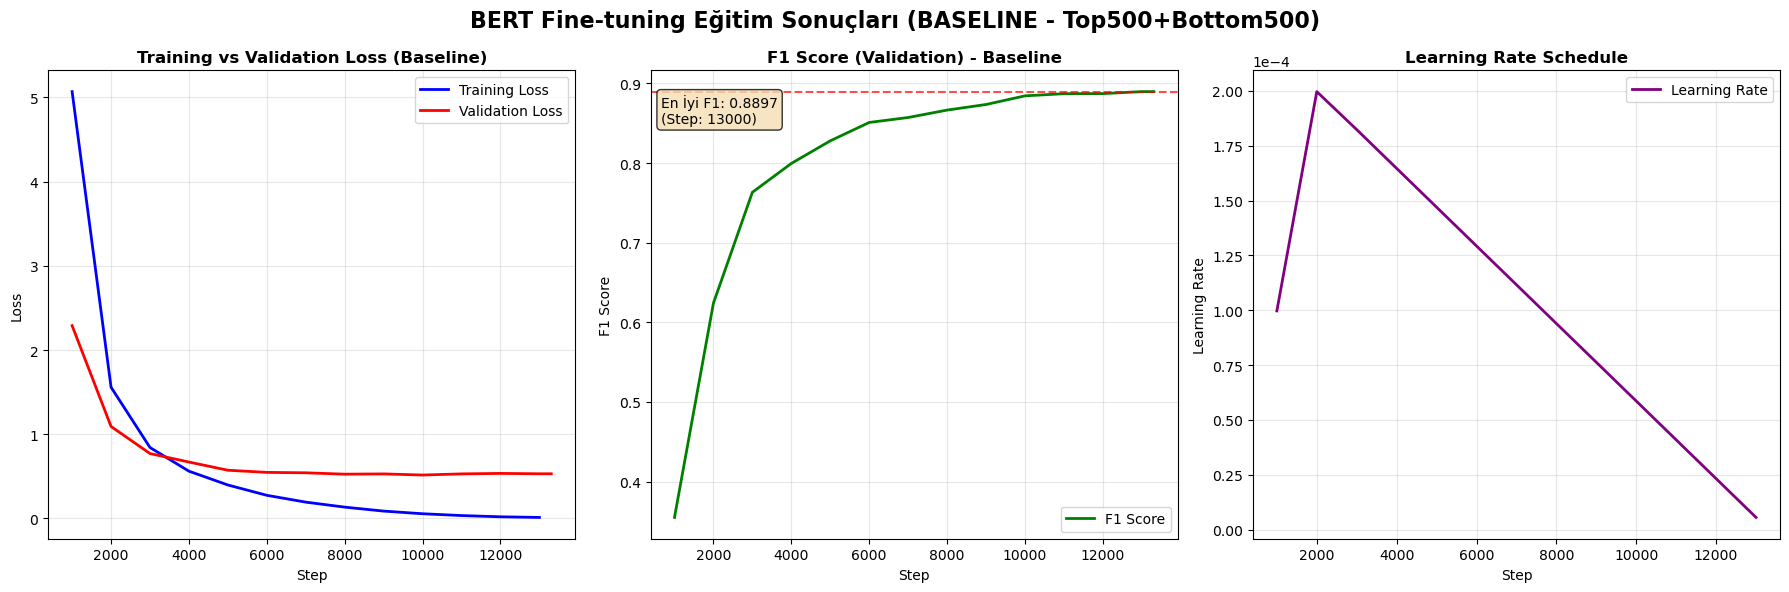


📊 BASELINE MODEL EĞİTİM ÖZETİ
🔢 Dataset: Top 500 + Bottom 500 labels (1000 sınıf)
⚖️ Class Weight: BASELINE (weight yok)
🔹 Son Training Loss: 0.0121
🔹 Son Validation Loss: 0.5305
🔹 En İyi F1 Score: 0.8897
🔹 Son F1 Score: 0.8897
🔹 Başlangıç Learning Rate: 9.97e-05
🔹 Son Learning Rate: 5.52e-06
🔹 LR Azalma Oranı: 5.5%
✅ Baseline grafik 'imbalance_baseline_results.png' olarak kaydedildi!
🔄 Sonraki adım: Class weight ekleyerek karşılaştırma yapabilirsiniz!


In [ ]:
# --- 11. WEIGHTED MODEL EĞİTİM GRAFİKLERİ ---
print("\n--- WEIGHTED MODEL EĞİTİM GRAFİKLERİ ÇİZİLİYOR ---")

import matplotlib.pyplot as plt
import pandas as pd

try:
    # Training history'den verileri çek
    history = trainer.state.log_history
    
    # Training ve validation verilerini ayır
    train_logs = [log for log in history if 'loss' in log and 'eval_loss' not in log]
    eval_logs = [log for log in history if 'eval_loss' in log]
    
    # Veri çerçeveleri oluştur
    train_df = pd.DataFrame(train_logs)
    eval_df = pd.DataFrame(eval_logs)
    
    # 2x2 subplot oluştur
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle('BERT Fine-tuning Eğitim Sonuçları (WEIGHTED - Class Balanced)', fontsize=16, fontweight='bold')
    
    # 1. Training vs Validation Loss (Aynı grafikte)
    if not train_df.empty and 'loss' in train_df.columns:
        ax1.plot(train_df['step'], train_df['loss'], 'b-', linewidth=2, label='Training Loss')
    if not eval_df.empty and 'eval_loss' in eval_df.columns:
        ax1.plot(eval_df['step'], eval_df['eval_loss'], 'r-', linewidth=2, label='Validation Loss')
    
    ax1.set_title('Training vs Validation Loss (Weighted)', fontweight='bold')
    ax1.set_xlabel('Step')
    ax1.set_ylabel('Loss')
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    
    # 2. F1 Score
    if not eval_df.empty and 'eval_f1' in eval_df.columns:
        ax2.plot(eval_df['step'], eval_df['eval_f1'], 'g-', linewidth=2, label='F1 Score')
        ax2.set_title('F1 Score (Validation) - Weighted', fontweight='bold')
        ax2.set_xlabel('Step')
        ax2.set_ylabel('F1 Score')
        ax2.grid(True, alpha=0.3)
        ax2.legend()
        
        # En iyi F1 score'u göster
        best_f1 = eval_df['eval_f1'].max()
        best_step = eval_df.loc[eval_df['eval_f1'].idxmax(), 'step']
        ax2.axhline(y=best_f1, color='red', linestyle='--', alpha=0.7)
        ax2.text(0.02, 0.95, f'En İyi F1: {best_f1:.4f}\n(Step: {best_step})', 
                transform=ax2.transAxes, fontsize=10, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    # 3. Learning Rate
    if not train_df.empty and 'learning_rate' in train_df.columns:
        ax3.plot(train_df['step'], train_df['learning_rate'], 'purple', linewidth=2, label='Learning Rate')
        ax3.set_title('Learning Rate Schedule', fontweight='bold')
        ax3.set_xlabel('Step')
        ax3.set_ylabel('Learning Rate')
        ax3.grid(True, alpha=0.3)
        ax3.legend()
        ax3.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))
    
    plt.tight_layout()
    plt.savefig('imbalance_weighted_results.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Özet istatistikler yazdır
    print("\n" + "="*60)
    print("📊 WEIGHTED MODEL EĞİTİM ÖZETİ")
    print("="*60)
    
    print(f"🔢 Dataset: Top 500 + Bottom 500 labels ({num_labels} sınıf)")
    print(f"⚖️ Class Weight: AKTIF (balanced strategy)")
    print(f"🎯 Weight Range: {min(class_weights_array):.4f} - {max(class_weights_array):.4f}")
    print(f"🔄 Imbalance Compensation: {max(class_weights_array)/min(class_weights_array):.1f}x")
    
    if not train_df.empty:
        final_train_loss = train_df['loss'].iloc[-1]
        print(f"🔹 Son Training Loss: {final_train_loss:.4f}")
    
    if not eval_df.empty:
        final_val_loss = eval_df['eval_loss'].iloc[-1]
        best_f1 = eval_df['eval_f1'].max()
        final_f1 = eval_df['eval_f1'].iloc[-1]
        print(f"🔹 Son Validation Loss: {final_val_loss:.4f}")
        print(f"🔹 En İyi F1 Score: {best_f1:.4f}")
        print(f"🔹 Son F1 Score: {final_f1:.4f}")
    
    if not train_df.empty and 'learning_rate' in train_df.columns:
        final_lr = train_df['learning_rate'].iloc[-1]
        initial_lr = train_df['learning_rate'].iloc[0]
        print(f"🔹 Başlangıç Learning Rate: {initial_lr:.2e}")
        print(f"🔹 Son Learning Rate: {final_lr:.2e}")
        print(f"🔹 LR Azalma Oranı: {(final_lr/initial_lr)*100:.1f}%")
    
    print("="*60)
    print("✅ Weighted model grafik 'imbalance_weighted_results.png' olarak kaydedildi!")
    print("🔄 Sonraki adım: Baseline ile weighted model performansını karşılaştırın!")
    
except Exception as e:
    print(f"❌ Grafik oluşturma hatası: {e}")
    print("⚠️ Training history verilerine erişilemedi.")

In [ ]:
# --- 12. BASELINE vs WEIGHTED MODEL KARŞILAŞTIRMASI ---
print("\n" + "="*80)
print("📊 BASELINE vs WEIGHTED MODEL KARŞILAŞTIRMASI")
print("="*80)

# Bu cell'i hem baseline hem de weighted model eğitildikten sonra çalıştırın
print("⚠️ Not: Bu karşılaştırma için önce baseline model (imbalance_baseline_model),")
print("   sonra weighted model (imbalance_weighted_model) eğitilmiş olmalı!")

try:
    # Baseline model sonuçları
    baseline_exists = False
    weighted_exists = False
    
    import os
    if os.path.exists('./imbalance_baseline_model'):
        baseline_exists = True
        print("✅ Baseline model bulundu")
    else:
        print("❌ Baseline model bulunamadı")
        
    if os.path.exists('./imbalance_weighted_model'):
        weighted_exists = True
        print("✅ Weighted model bulundu")
    else:
        print("❌ Weighted model bulunamadı")
    
    if baseline_exists and weighted_exists:
        print("\n🎯 HER İKİ MODEL DE MEVCUT! Karşılaştırma yapılabilir:")
        print("   1. İlk önce baseline model ile train edin")
        print("   2. Sonra weighted model ile train edin") 
        print("   3. Bu cell'i çalıştırarak performans karşılaştırması yapın")
        
        # Model dosyalarını kontrol et
        import joblib
        
        # Baseline weight stats (yok, çünkü baseline)
        baseline_stats = {
            'strategy': 'none (baseline)',
            'class_weights': 'uniform (1.0 for all classes)'
        }
        
        # Weighted model stats
        if os.path.exists('./imbalance_weighted_model/weight_stats.pkl'):
            weighted_stats = joblib.load('./imbalance_weighted_model/weight_stats.pkl')
            
            print(f"\n📈 MODEL KONFİGÜRASYONLARI:")
            print(f"   🔵 Baseline Model:")
            print(f"      - Class weights: Yok (tüm sınıflar eşit)")
            print(f"      - Strategy: Uniform weighting")
            
            print(f"   🟢 Weighted Model:")
            print(f"      - Class weights: Aktif")
            print(f"      - Strategy: {weighted_stats['strategy']}")
            print(f"      - Weight range: {weighted_stats['min_weight']:.4f} - {weighted_stats['max_weight']:.4f}")
            print(f"      - Compensation ratio: {weighted_stats['weight_range']:.1f}x")
            print(f"      - Original imbalance: {weighted_stats['imbalance_ratio']:.1f}x")
        
        print(f"\n🔄 SONRAKI ADIMLAR:")
        print(f"   1. Her iki modeli de train edin")
        print(f"   2. Evaluation metriklerini karşılaştırın")
        print(f"   3. Özellikle Macro Precision/Recall'a odaklanın (küçük sınıf performansı)")
        print(f"   4. Class-wise performans analizini inceleyin")
        
    else:
        print("\n⚠️ Karşılaştırma için her iki model de eğitilmiş olmalı!")
        print("   Önce mevcut kodu baseline olarak çalıştırın, sonra weighted version'ı çalıştırın.")
        
except Exception as e:
    print(f"❌ Karşılaştırma analizi hatası: {e}")

print("="*80)